<a href="https://colab.research.google.com/github/GalchynskaSofiia/Machine_learning-/blob/main/%D0%9B%D0%A02_%D0%93%D0%B0%D0%BB%D1%8C%D1%87%D0%B8%D0%BD%D1%81%D1%8C%D0%BA%D0%B0_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторна робота 2. Аналіз даних. Бібліотека Pandas.**
**Частина 1.**
**Варіант 4**

Автор: Гальчинська Софія Володимирівна ФІТ 4-8

In [2]:
import numpy as np
import pandas as pd
import requests

**Завдання 1.**
Зчитати датасет ВВП (млн. дол. США) за країнами з Вікіпедії за посиланням та провести попередній аналіз даних.
Датасет було отримано з Вікіпедії з використанням бібліотеки Pandas.

1. Вивести перших 5 рядків.

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
html = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text

tables = pd.read_html(html) # команда для зчитування всіх таблиць безпосередньо зі сторінки.
df = tables[2]  #зазначення потрібної таблиці
df.head()

/tmp/ipython-input-239533393.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html) # команда для зчитування всіх таблиць безпосередньо зі сторінки.


,Country/Territory,IMF (2025)[1][6],World Bank (2022–24)[7],United Nations (2023)[8]
0,World,113795678,111326370,100834796
1,United States,30507217,29184890,27720700
2,China[n 1],19231705,18743803,17794782
3,Germany,4744804,4659929,4525704
4,India,4187017,3912686,3575778


2. Визначити розмір датасета.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country/Territory         222 non-null    object
 1   IMF (2025)[1][6]          222 non-null    object
 2   World Bank (2022–24)[7]   222 non-null    object
 3   United Nations (2023)[8]  222 non-null    object
dtypes: object(4)
memory usage: 7.1+ KB


3. Визначити оптимальну кількість стовпців.

In [8]:
#кількість стовпців, що наразі є у таблиці - оптимальна. Проте доцільно прибрати перший рядок "World",що відповідає за загальні дані по світу.
df = df.drop(0)
df.head()

,Country,IMF (2025),World Bank (2022–24),United Nations (2023)
1,United States,30507217,29184890,27720700
2,China[n 1],19231705,18743803,17794782
3,Germany,4744804,4659929,4525704
4,India,4187017,3912686,3575778
5,Japan,4186431,4026211,4204495


4. Змінити назви стовпців на більш зручні

In [12]:
df.columns = (df.columns
              .str.replace(r'(?:\s*\[\d+\])+', '', regex=True)  #прибираємо службові [1], [7]..., шляхом їх заміни на порожній символ ''
              .str.replace('Country/Territory', 'Country', regex=False)) #замінюємо назву колонки на більш лаконічну "країна"
df

,Country,IMF (2025),World Bank (2022–24),United Nations (2023)
1,United States,30507217,29184890,27720700
2,China[n 1],19231705,18743803,17794782
3,Germany,4744804,4659929,4525704
4,India,4187017,3912686,3575778
5,Japan,4186431,4026211,4204495
...,...,...,...,...
217,Kiribati,312,308,289
218,Marshall Islands,297,280,270
219,Nauru,169,160,176
220,Montserrat,NaN,NaN,80


5. Визначити тип даних.

In [14]:
df.dtypes

,0
Country,object
IMF (2025),object
World Bank (2022–24),object
United Nations (2023),object


6. Замініть у таблиці значення "—" на значення NaN. Перевірити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.

In [15]:
df.replace('—', np.nan, inplace=True) #заміна "—" на значення NaN
df.isnull().sum() #перевірка кількості пропущених значень

,0
Country,0
IMF (2025),32
World Bank (2022–24),12
United Nations (2023),9


In [16]:
#змінюємо тип даних у колонках на тип float
df['IMF (2025)'] = pd.to_numeric(df['IMF (2025)'], errors='coerce')
df['World Bank (2022–24)'] = pd.to_numeric(df['World Bank (2022–24)'], errors='coerce')
df['United Nations (2023)'] = pd.to_numeric(df['United Nations (2023)'], errors='coerce')
df.dtypes

,0
Country,object
IMF (2025),float64
World Bank (2022–24),float64
United Nations (2023),float64


In [19]:
#замінюємо пропущені значення на середнє значення.
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()), axis=1)
df

,Country,IMF (2025),World Bank (2022–24),United Nations (2023)
1,United States,30507217.0,29184890.0,27720700.0
2,China[n 1],19231705.0,18743803.0,17794782.0
3,Germany,4744804.0,4659929.0,4525704.0
4,India,4187017.0,3912686.0,3575778.0
5,Japan,4186431.0,4026211.0,4204495.0
...,...,...,...,...
217,Kiribati,312.0,308.0,289.0
218,Marshall Islands,297.0,280.0,270.0
219,Nauru,169.0,160.0,176.0
220,Montserrat,80.0,80.0,80.0


7. Ще раз перевірити наявність пропущених значень.

In [20]:
df.isnull().sum()

,0
Country,0
IMF (2025),0
World Bank (2022–24),0
United Nations (2023),0


8. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [23]:
df.duplicated().sum() #оскільки число дублікатів 0, то нічого не видаляємо.

np.int64(0)

9. Вивести описову статистику датасету describe()

In [26]:
df.describe()

,IMF (2025),World Bank (2022–24),United Nations (2023)
count,221.000000,221.000000,221.000000
mean,516153.529412,502232.746606,479777.013575
std,2498165.074269,2404837.563609,2287285.152061
min,65.000000,62.000000,68.000000
25%,7431.000000,7139.000000,6721.000000
50%,33548.000000,32538.000000,30408.000000
75%,222776.000000,217983.000000,213003.000000
max,30507217.000000,29184890.000000,27720700.000000


10. Визначте відхилення (різницю) між показниками IMF (2025) та World Bank (2022-24): для кожної країни. У яких країнах ці показники найбільше відрізняються (дати відповідь)?

In [28]:
df['IMF_WB_Diff'] = abs(df['IMF (2025)'] - df['World Bank (2022–24)'])
df.head(10)

,Country,IMF (2025),World Bank (2022–24),United Nations (2023),IMF_WB_Diff
1,United States,30507217.000000,29184890.000000,27720700.000000,1322327.000000
2,China[n 1],19231705.000000,18743803.000000,17794782.000000,487902.000000
3,Germany,4744804.000000,4659929.000000,4525704.000000,84875.000000
4,India,4187017.000000,3912686.000000,3575778.000000,274331.000000
5,Japan,4186431.000000,4026211.000000,4204495.000000,160220.000000
6,United Kingdom,3839180.000000,3643834.000000,3380855.000000,195346.000000
7,France,3211292.000000,3162079.000000,3051832.000000,49213.000000
8,Italy,2422855.000000,2372775.000000,2300941.000000,50080.000000
9,Canada,2225341.000000,2241253.000000,2142471.000000,15912.000000
10,Brazil,2125958.000000,2179412.000000,2191132.000000,53454.000000


In [37]:
max_diff = df['IMF_WB_Diff'].max() #знаходимо найбільшу різницю
country = df[df['IMF_WB_Diff'] == max_diff]['Country'].values[0]  #визначаємо, яка країна має цю найбільшу різницю
print(f'У країни {country} найбільша різниця між показниками IMF (2025) та WorldBank (2022-24), що становить: {max_diff}')

У країни United States найбільша різниця між показниками IMF (2025) та WorldBank (2022-24), що становить: 1322327.0


11.Обчисліть кореляцію між показниками IMF (2025), World Bank (2022-24) та United Nations (2023). Які пари змінних мають найвищу кореляцію?

In [38]:
cor_IMF_WB = df['IMF (2025)'].corr(df['World Bank (2022–24)'])
print(f'Кореляція між IMF та WB: {cor_IMF_WB}')

Кореляція між IMF та WB: 0.9998848220171325


In [39]:
cor_IMF_UN = df['IMF (2025)'].corr(df['United Nations (2023)'])
print(f'Кореляція між IMF та UN: {cor_IMF_UN}')

Кореляція між IMF та UN: 0.9997066359496977


In [40]:
cor_WB_UN = df['World Bank (2022–24)'].corr(df['United Nations (2023)'])
print(f'Кореляція між  WB та UN: {cor_WB_UN}')

Кореляція між  WB та UN: 0.9998476653201757


In [41]:
#визначає найвищу кореляцію
max_cor = max(cor_IMF_WB, cor_IMF_UN, cor_WB_UN)
if max_cor == cor_IMF_WB:
    print('IMF та WB мають найвищу кореляцію')
elif max_cor == cor_IMF_UN:
    print('IMF та UN мають найвищу кореляцію')
else:
    print('WB та UN мають найвищу кореляцію')

IMF та WB мають найвищу кореляцію


12. Обчисліть середнє значення для кожного стовпця (IMF (2025), World Bank (2022-24) та United Nations (2023)). Як це середнє значення змінюється між роками?

In [47]:
mean_IMF = df['IMF (2025)'].mean() #середнє значення стовпця IMF (2025)
mean_IMF

np.float64(516153.5294117647)

In [48]:
mean_WB = df['World Bank (2022–24)'].mean() #середнє значення стовпця World Bank (2022-24)
mean_WB

np.float64(502232.74660633487)

In [49]:
mean_UN = df['United Nations (2023)'].mean() #середнє значення стовпця United Nations (2023)
mean_UN

np.float64(479777.01357466064)

In [50]:
print(f'Тенденція {"зростає" if mean_IMF > mean_UN else "спадає"}')

Тенденція зростає


13. Обчисліть стандартне відхилення показників для кожної країни. Яка країна має найвищу варіативність у показниках між роками?

In [52]:
df['std'] = df.iloc[:, 1:].std(axis=1) #Обчислюємо стандартне відхилення показників для кожної країни
df.head(10)

,Country,IMF (2025),World Bank (2022–24),United Nations (2023),IMF_WB_Diff,std
1,United States,30507217.000000,29184890.000000,27720700.000000,1322327.000000,12632642.901578
2,China[n 1],19231705.000000,18743803.000000,17794782.000000,487902.000000,8166783.428394
3,Germany,4744804.000000,4659929.000000,4525704.000000,84875.000000,2049764.582229
4,India,4187017.000000,3912686.000000,3575778.000000,274331.000000,1664441.177529
5,Japan,4186431.000000,4026211.000000,4204495.000000,160220.000000,1799767.796721
6,United Kingdom,3839180.000000,3643834.000000,3380855.000000,195346.000000,1563370.084546
7,France,3211292.000000,3162079.000000,3051832.000000,49213.000000,1389713.190405
8,Italy,2422855.000000,2372775.000000,2300941.000000,50080.000000,1042093.647267
9,Canada,2225341.000000,2241253.000000,2142471.000000,15912.000000,980527.549131
10,Brazil,2125958.000000,2179412.000000,2191132.000000,53454.000000,951064.866862


In [53]:
max_std = df['std'].max() #знаходимо найбільше відхилення
country = df[df['std'] == max_std]['Country'].values[0] #визначаємо, яка країна має це найбільше відхилення
print(f'{country} має найбільше стандартне відхилення, що становить: {max_std}')

United States має найбільше стандартне відхилення, що становить: 12632642.901578361


14. Визначення країни з найвищим та найнижчим показниками: Знайдіть країну з найвищим та найнижчим показниками у кожному з років (IMF (2025), World Bank (2022-24) та United Nations (2023)).

In [55]:
max_IMF = df['IMF (2025)'].max();
country = df[df['IMF (2025)'] == max_IMF]['Country'].values[0]
print(f'Країна {country} має найвищий показник у 2025 році за даними IMF, що становить: {max_IMF}')

Країна United States має найвищий показник у 2025 році за даними IMF, що становить: 30507217.0


In [56]:
min_IMF = df['IMF (2025)'].min()
country = df[df['IMF (2025)'] == min_IMF]['Country'].values[0]
print(f'Країна {country} має найнижчий показник у 2025 році за даними IMF, що становить: {min_IMF}')

Країна Tuvalu має найнижчий показник у 2025 році за даними IMF, що становить: 65.0


In [58]:
max_WB = df['World Bank (2022–24)'].max()
country = df[df['World Bank (2022–24)'] == max_WB]['Country'].values[0]
print(f'Країна {country} має найвищий показник у 2022-24 роках за даними World Bank, що становить: {max_WB}')

Країна United States має найвищий показник у 2022-24 роках за даними World Bank, що становить: 29184890.0


In [59]:
min_WB = df['World Bank (2022–24)'].min()
country = df[df['World Bank (2022–24)'] == min_WB]['Country'].values[0]
print(f'Країна {country} має найнижчий показник у 2022-24 роках за даними World Bank, що становить: {min_WB}')

Країна Tuvalu має найнижчий показник у 2022-24 роках за даними World Bank, що становить: 62.0


In [60]:
max_UN = df['United Nations (2023)'].max()
country = df[df['United Nations (2023)'] == max_UN]['Country'].values[0]
print(f'Країна {country} має найвищий показник у 2023 році за даними United Nations, що становить: {max_UN}')

Країна United States має найвищий показник у 2023 році за даними United Nations, що становить: 27720700.0


In [62]:
min_UN = df['United Nations (2023)'].min()
country = df[df['United Nations (2023)'] == min_UN]['Country'].values[0]
print(f'Країна {country} має найнижчий показник у 2023 році за даними United Nations, що становить: {min_UN}')

Країна Tuvalu має найнижчий показник у 2023 році за даними United Nations, що становить: 68.0


15. Побудуйте гістограму для розподілу показників IMF (2025) серед всіх країн. Який вигляд має розподіл? Чи є країни, що виділяються?

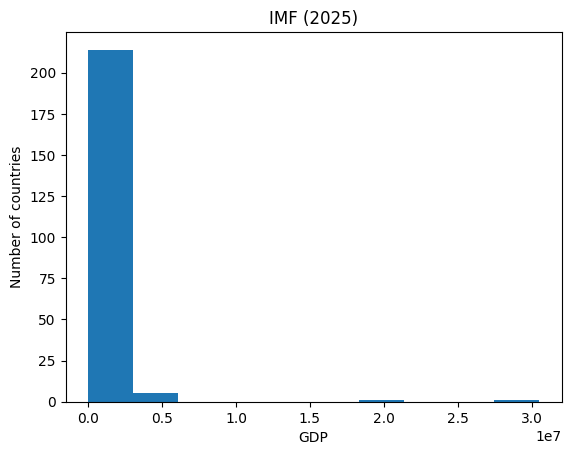

In [63]:
import matplotlib.pyplot as plt
plt.hist(df['IMF (2025)'], bins=10)
plt.title('IMF (2025)')
plt.xlabel('GDP')
plt.ylabel('Number of countries')
plt.show()

За гістограмою можна побачити, що за даними IMF 2025 року більшість країн має ВВП в межах 0-0.25 * 10^7. Натомість є декілька країн, що мають більше ВВП (в межах 0.25-0.5 * 10^7).

16. Розрахуйте частку кожної країни в загальному значенні для кожного року (IMF (2025), World Bank (2022-24) та United Nations (2023)). Як змінюються частки країн з часом (дати відповідь)?

In [65]:
df['IMF_Share'] = df['IMF (2025)'] / df['IMF (2025)'].sum()
df['WB_Share'] = df['World Bank (2022–24)'] / df['World Bank (2022–24)'].sum()
df['UN_Share'] = df['United Nations (2023)'] / df['United Nations (2023)'].sum()

df.head(10)

,Country,IMF (2025),World Bank (2022–24),United Nations (2023),IMF_WB_Diff,std,IMF_Share,WB_Share,UN_Share
1,United States,30507217.000000,29184890.000000,27720700.000000,1322327.000000,12632642.901578,0.267443,0.262942,0.261440
2,China[n 1],19231705.000000,18743803.000000,17794782.000000,487902.000000,8166783.428394,0.168596,0.168873,0.167827
3,Germany,4744804.000000,4659929.000000,4525704.000000,84875.000000,2049764.582229,0.041596,0.041984,0.042683
4,India,4187017.000000,3912686.000000,3575778.000000,274331.000000,1664441.177529,0.036706,0.035252,0.033724
5,Japan,4186431.000000,4026211.000000,4204495.000000,160220.000000,1799767.796721,0.036701,0.036274,0.039654
6,United Kingdom,3839180.000000,3643834.000000,3380855.000000,195346.000000,1563370.084546,0.033656,0.032829,0.031886
7,France,3211292.000000,3162079.000000,3051832.000000,49213.000000,1389713.190405,0.028152,0.028489,0.028783
8,Italy,2422855.000000,2372775.000000,2300941.000000,50080.000000,1042093.647267,0.021240,0.021378,0.021701
9,Canada,2225341.000000,2241253.000000,2142471.000000,15912.000000,980527.549131,0.019509,0.020193,0.020206
10,Brazil,2125958.000000,2179412.000000,2191132.000000,53454.000000,951064.866862,0.018637,0.019636,0.020665


17. Візуалізуйте зміни в показниках для кожної країни за три роки на графіку. Які країни показують стабільне зростання або спад (дати відповідь)?

In [68]:
#Виводимо 10 країн з найбільш значною зміною частки світового ВВП між IMF (2025) та UN (2023)
df['IMF_UN_Diff'] = abs(df['IMF_Share'] - df['UN_Share'])
df_top10 = df.nlargest(10, 'IMF_UN_Diff')
df_top10

,Country,IMF (2025),World Bank (2022–24),United Nations (2023),IMF_WB_Diff,std,IMF_Share,WB_Share,UN_Share,IMF_UN_Diff
1,United States,30507217.000000,29184890.000000,27720700.000000,1322327.000000,12632642.901578,0.267443,0.262942,0.261440,0.006003
4,India,4187017.000000,3912686.000000,3575778.000000,274331.000000,1664441.177529,0.036706,0.035252,0.033724,0.002982
5,Japan,4186431.000000,4026211.000000,4204495.000000,160220.000000,1799767.796721,0.036701,0.036274,0.039654,0.002953
15,Mexico,1692640.000000,1852723.000000,1793799.000000,160083.000000,747240.594114,0.014839,0.016692,0.016918,0.002079
16,Turkey,1437406.000000,1323255.000000,1118253.000000,114151.000000,552010.534082,0.012601,0.011922,0.010547,0.002055
10,Brazil,2125958.000000,2179412.000000,2191132.000000,53454.000000,951064.866862,0.018637,0.019636,0.020665,0.002028
59,Nigeria,188271.000000,187760.000000,374984.000000,511.000000,133318.605252,0.001650,0.001692,0.003537,0.001886
6,United Kingdom,3839180.000000,3643834.000000,3380855.000000,195346.000000,1563370.084546,0.033656,0.032829,0.031886,0.001771
13,South Korea,1790322.000000,1712793.000000,1839058.000000,77529.000000,772198.407809,0.015695,0.015431,0.017345,0.001650
14,Australia,1771681.000000,1752193.000000,1775628.000000,19488.000000,783555.318566,0.015532,0.015786,0.016746,0.001215


За отриманою таблицею бачимо, що динаміка змін у частках ВВП різних країн світу є, проте вона залишається незначною. Найбільші зміни мають Сполучені Штати Америки, проте навіть їх показник за роки змінився всього на 0.006003.
Стабільне зростання частки ВВП показують такі країни як: США, Індія, Турція та Великобританія.
Натомість стабільний спад демонструють Мексика, Бразилія, Нігерія та Австралія.

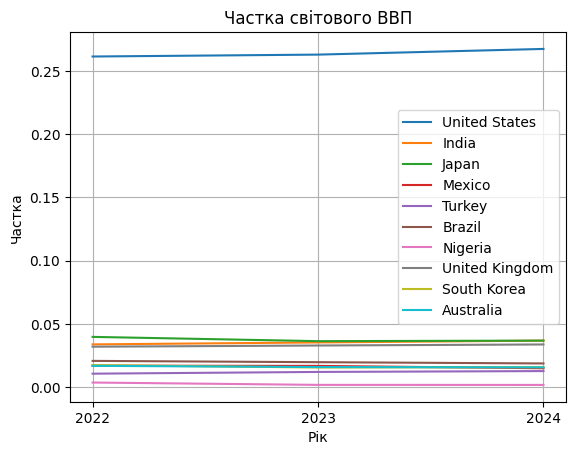

In [73]:
#візуалізуємо ці дані на графіку. Графік відображає
for index, row in df_top10.iterrows():
    plt.plot(row[['UN_Share', 'WB_Share', 'IMF_Share']], label=row['Country'])

plt.title('Частка світового ВВП')
plt.xlabel('Рік')
plt.xticks(ticks=[0, 1, 2], labels=['2022', '2023', '2024'])
plt.ylabel('Частка')
plt.legend()
plt.grid()
plt.show()

**Висвноки:** Під час виконання даної лабораторної роботи було проведено аналіз датасету "Прогноз або оцінка ВВП (млн дол. США) за країною", зокрема отримано такі важливі аналітичні показники, як: кореляція, стандартне відхилення, середні значення, найвищи та найнижчі показники за роки і тд. Проведено розрахунки частку кожної країни у світовому ВВП та опрацьовано результати, на основі яких складено порівняльні таблиці та гістограму.